In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

movies = pd.read_csv("IMDb movies.csv")
moviesdf = pd.DataFrame(movies)

c:\users\paola\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
moviesdf.drop(columns=['budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore'], inplace=True, axis=1)

In [3]:
# filling in the na as 0 for reviews as reviews are on a scale of 0-10
moviesdf["reviews_from_users"] = moviesdf["reviews_from_users"].fillna(0)
moviesdf["reviews_from_critics"] = moviesdf["reviews_from_critics"].fillna(0)
moviesdf.isnull().sum()

imdb_title_id              0
title                      0
original_title             0
year                       0
date_published             0
genre                      0
duration                   0
country                   64
language                 833
director                  87
writer                  1572
production_company      4455
actors                    69
description             2115
avg_vote                   0
votes                      0
reviews_from_users         0
reviews_from_critics       0
dtype: int64

In [4]:
# filling in the na for the attributes that should remain as strings
# all NA are UNKNOWN
moviesdf["country"] = moviesdf["country"].fillna("UNKNOWN")
moviesdf["language"] = moviesdf["language"].fillna("UNKNOWN")
moviesdf["director"] = moviesdf["director"].fillna("UNKNOWN")
moviesdf["writer"] = moviesdf["writer"].fillna("UNKNOWN")
moviesdf["production_company"] = moviesdf["production_company"].fillna("UNKNOWN")
moviesdf["actors"] = moviesdf["actors"].fillna("UNKNOWN")
moviesdf["description"] = moviesdf["description"].fillna("UNKNOWN")
moviesdf.isnull().sum()

imdb_title_id           0
title                   0
original_title          0
year                    0
date_published          0
genre                   0
duration                0
country                 0
language                0
director                0
writer                  0
production_company      0
actors                  0
description             0
avg_vote                0
votes                   0
reviews_from_users      0
reviews_from_critics    0
dtype: int64

In [5]:
ratings = pd.read_csv("IMDb ratings.csv")
ratingsdf = pd.DataFrame(ratings)

In [6]:
ratingsdf.drop(columns=['allgenders_0age_avg_vote',
                         'allgenders_0age_votes',
                         'allgenders_18age_avg_vote',
                         'allgenders_18age_votes',
                         'allgenders_30age_avg_vote',
                         'allgenders_30age_votes',
                         'allgenders_45age_avg_vote',
                         'allgenders_45age_votes',
                         'males_0age_avg_vote',
                         'males_0age_votes',
                         'males_18age_avg_vote',
                         'males_18age_votes',
                         'males_30age_avg_vote',
                         'males_30age_votes', 
                         'males_45age_avg_vote', 
                         'males_45age_votes', 
                         'females_0age_avg_vote', 
                         'females_0age_votes', 
                         'females_18age_avg_vote', 
                         'females_18age_votes', 
                         'females_30age_avg_vote', 
                         'females_30age_votes', 
                         'females_45age_avg_vote', 
                         'females_45age_votes', 
                         'top1000_voters_rating', 
                         'top1000_voters_votes', 
                         'us_voters_rating', 
                         'us_voters_votes', 
                         'non_us_voters_rating', 
                         'non_us_voters_votes'], inplace=True, axis=1)

In [7]:
ratingsdf = ratingsdf.fillna(0)
ratingsdf.isnull().sum()

imdb_title_id               0
weighted_average_vote       0
total_votes                 0
mean_vote                   0
median_vote                 0
votes_10                    0
votes_9                     0
votes_8                     0
votes_7                     0
votes_6                     0
votes_5                     0
votes_4                     0
votes_3                     0
votes_2                     0
votes_1                     0
males_allages_avg_vote      0
males_allages_votes         0
females_allages_avg_vote    0
females_allages_votes       0
dtype: int64

In [8]:
# merging the two merged dataframes into one complete dataframe based on 'imdb_title_id'
complete_df = pd.merge( moviesdf, ratingsdf, on='imdb_title_id', how='outer')
complete_df = complete_df.dropna()
print(complete_df.isnull().sum())

complete_df[['Genre1','Genre2','Genre3']] = complete_df.genre.str.split(",",expand=True,)
complete_df.head(10)


imdb_title_id               0
title                       0
original_title              0
year                        0
date_published              0
genre                       0
duration                    0
country                     0
language                    0
director                    0
writer                      0
production_company          0
actors                      0
description                 0
avg_vote                    0
votes                       0
reviews_from_users          0
reviews_from_critics        0
weighted_average_vote       0
total_votes                 0
mean_vote                   0
median_vote                 0
votes_10                    0
votes_9                     0
votes_8                     0
votes_7                     0
votes_6                     0
votes_5                     0
votes_4                     0
votes_3                     0
votes_2                     0
votes_1                     0
males_allages_avg_vote      0
males_alla

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,votes_3,votes_2,votes_1,males_allages_avg_vote,males_allages_votes,females_allages_avg_vote,females_allages_votes,Genre1,Genre2,Genre3
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,1,5,14,6.2,97.0,6.0,35.0,Romance,None,None
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,12/26/06,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,20,13,16,6.1,425.0,6.2,50.0,Biography,Crime,Drama
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,8/19/11,Drama,53,"Germany, Denmark",UNKNOWN,Urban Gad,...,5,6,4,5.9,146.0,5.7,15.0,Drama,None,None
3,tt0002101,Cleopatra,Cleopatra,1912,11/13/12,"Drama, History",100,USA,English,Charles L. Gaskill,...,26,25,16,5.1,299.0,5.9,39.0,Drama,History,None
4,tt0002130,L'Inferno,L'Inferno,1911,3/6/11,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,39,20,87,7.0,1607.0,7.2,215.0,Adventure,Drama,Fantasy
5,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,...,20,18,34,5.7,354.0,5.8,31.0,Biography,Drama,None
6,tt0002423,Madame DuBarry,Madame DuBarry,1919,11/26/19,"Biography, Drama, Romance",85,Germany,German,Ernst Lubitsch,...,13,4,28,6.6,530.0,7.4,93.0,Biography,Drama,Romance
7,tt0002445,Quo Vadis?,Quo Vadis?,1913,3/1/13,"Drama, History",120,Italy,Italian,Enrico Guazzoni,...,6,2,10,6.2,191.0,6.3,21.0,Drama,History,None
8,tt0002452,Independenta Romaniei,Independenta Romaniei,1912,9/1/12,"History, War",120,Romania,UNKNOWN,"Aristide Demetriade, Grigore Brezeanu",...,5,3,6,6.7,153.0,7.0,19.0,History,War,None
9,tt0002461,Richard III,Richard III,1912,10/15/12,Drama,55,"France, USA",English,"André Calmettes, James Keane",...,8,4,26,5.5,168.0,7.7,15.0,Drama,None,None


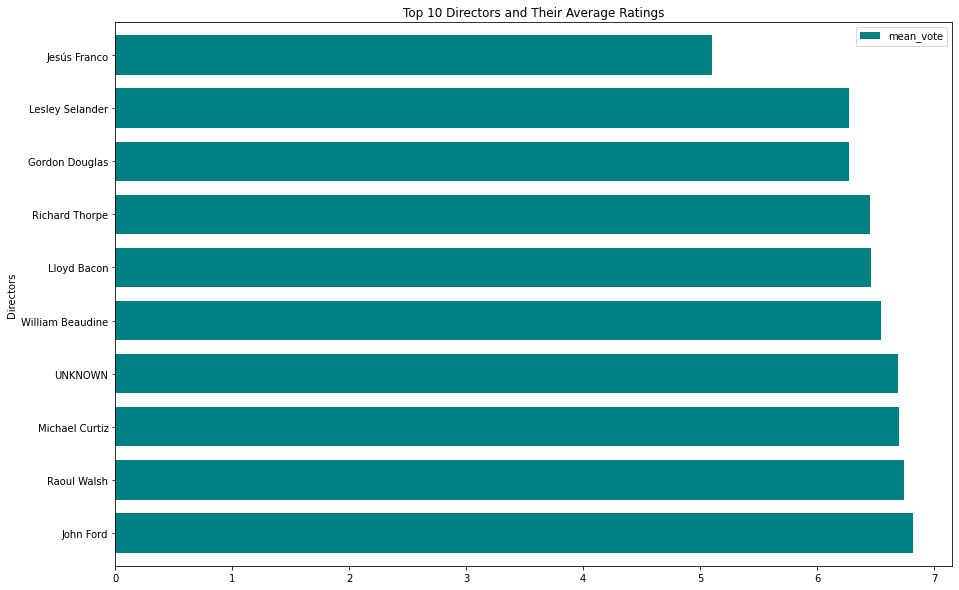

In [9]:
# to get the mena of the avg votes
directors_mean_df = complete_df.groupby(['director'])[['mean_vote']].mean()

# to get the total movies they worked on
directors_total_df = complete_df.groupby(['director'])[['title']].count()

all_directors_df = pd.concat([directors_mean_df, directors_total_df], axis=1)
all_directors_df = all_directors_df.sort_values(['title'], ascending = False)

top_ten_directors = all_directors_df.head(10)

top_ten_directors = top_ten_directors.sort_values(['mean_vote'], ascending = False)
top_ten_directors.plot.barh(figsize=(15,10), y='mean_vote', width=.75, xlabel="Directors", title="Top 10 Directors and Their Average Ratings", color=["teal"]);


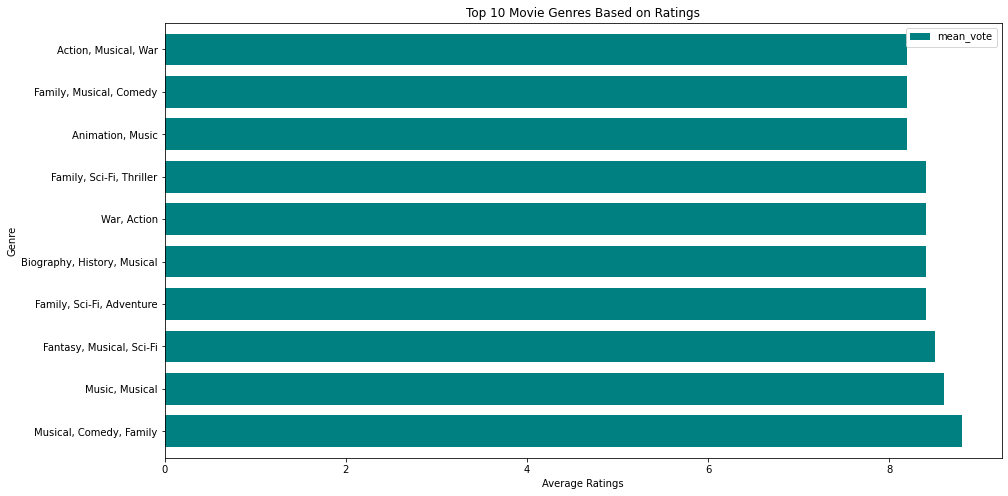

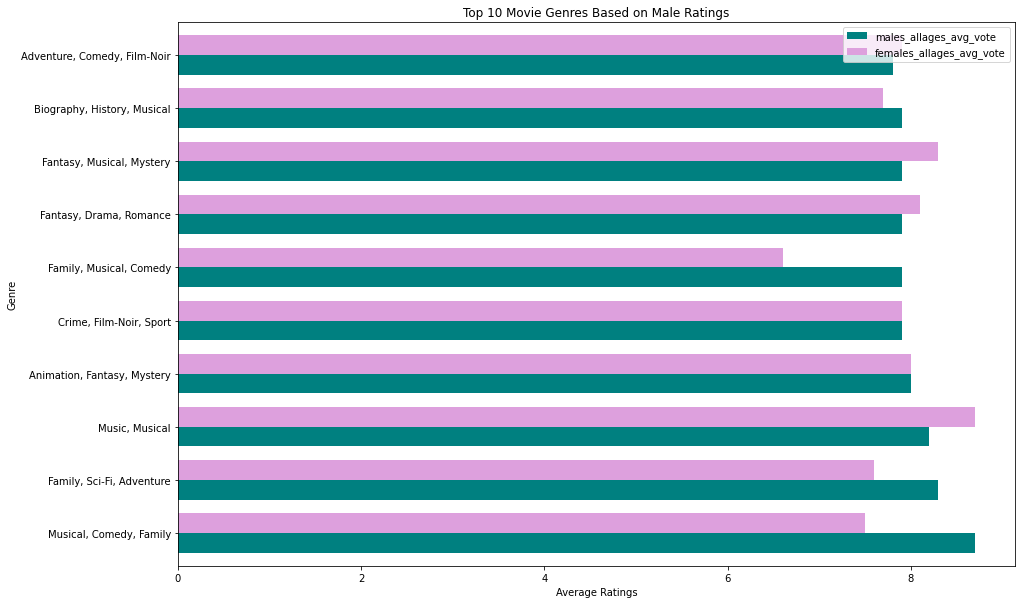

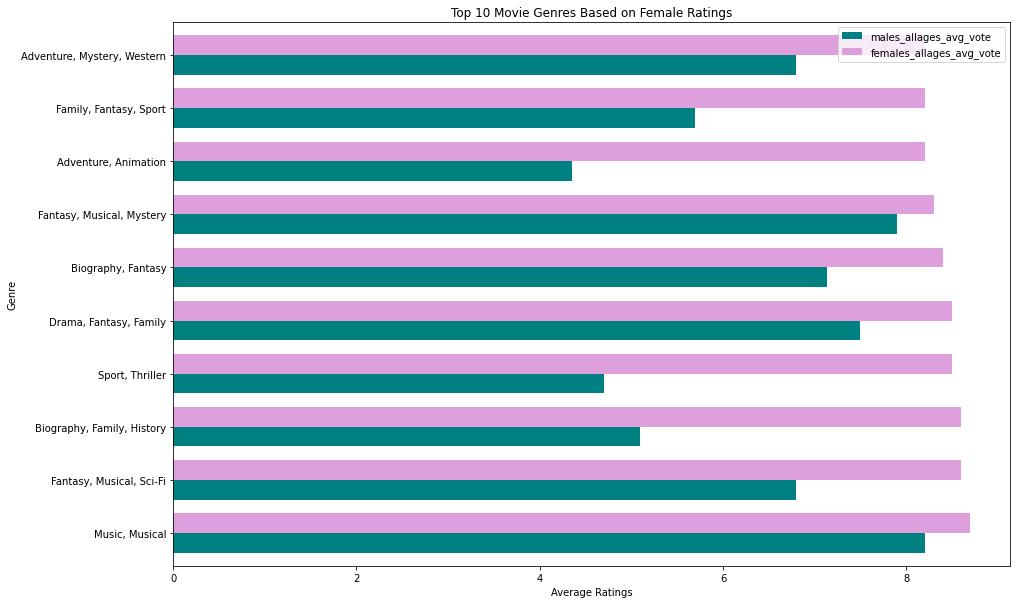

In [10]:
genredf = complete_df.groupby(['genre'])[['mean_vote']].mean().reset_index();
genredf = genredf.sort_values(['mean_vote'], ascending = False);

toptengenre = genredf.head(10)

toptengenre.plot.barh(figsize=(15,8), x="genre", width=.75, xlabel="Genre", title="Top 10 Movie Genres Based on Ratings", color="teal");
plt.xlabel("Average Ratings")
plt.xticks(rotation='horizontal');


male_female_genre = complete_df.groupby(['genre'])[['males_allages_avg_vote', 'females_allages_avg_vote']].mean().reset_index();
male_genre = male_female_genre.sort_values(['males_allages_avg_vote'], ascending = False);
female_genre = male_female_genre.sort_values(['females_allages_avg_vote'], ascending = False);


male_genre = male_genre.head(10)
male_genre.plot.barh(figsize=(15,10), x="genre", width=.75, xlabel="Genre", title="Top 10 Movie Genres Based on Male Ratings", color=["teal", "plum"]);
plt.xlabel("Average Ratings");


female_genre = female_genre.head(10)
female_genre.plot.barh(figsize=(15,10), x="genre", width=.75, xlabel="Genre", title="Top 10 Movie Genres Based on Female Ratings", color=["teal", "plum"]);
plt.xlabel("Average Ratings");

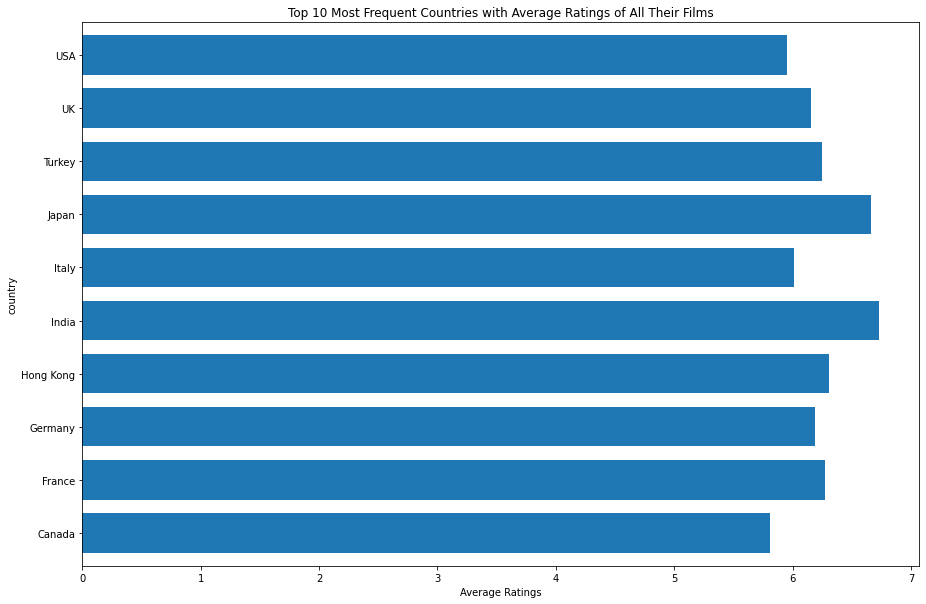

In [11]:
## EDA, Looking For Relation between Country Origin & Rating
## ---------------------------------------------------------

## Finding Most Used Countries (top 10)
most_freq_countries = list(complete_df['country'].value_counts()[:10].index)

## Shrink Dataframe by Top10 Countries
df = complete_df[complete_df['country'].isin(most_freq_countries)]

## Calculating Avg Rating per Countries
s = df.groupby(by=['country'])['mean_vote'].sum() #sum
c = df['country'].value_counts()                  #counts

s.sort_index(inplace=True)
c.sort_index(inplace=True)

avg_rating_countries = s/c

## Graphing Findings
avg_rating_countries.plot.barh(figsize=(15,10), width=.75, title="Top 10 Most Frequent Countries with Average Ratings of All Their Films")
plt.xlabel("Average Ratings")
plt.show()

Text(0.5, 0, 'Counts')

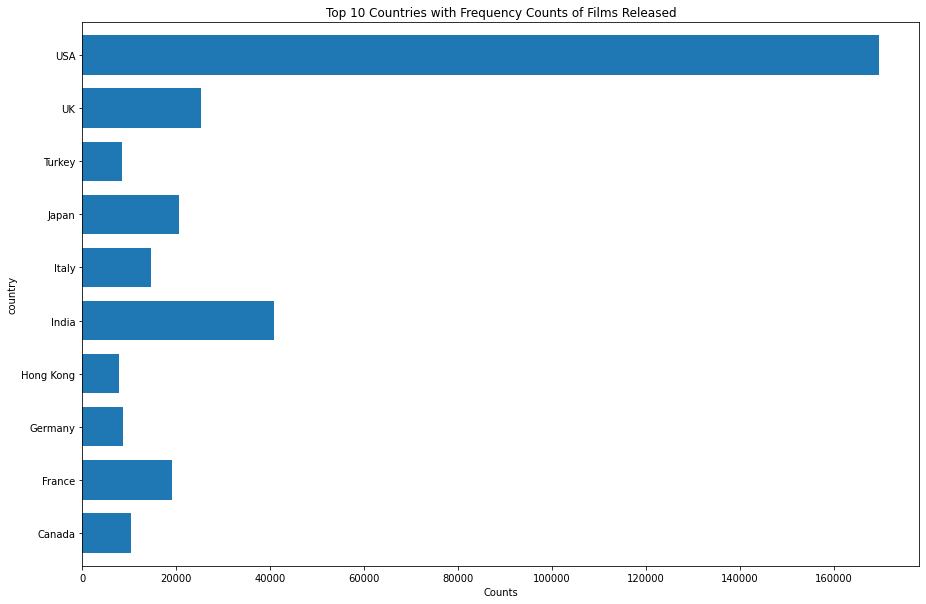

In [12]:
## EDA, Looking For Relation between Country Origin & Rating (Continued)
## ---------------------------------------------------------

#Plotting Freq Counts
s.plot.barh(figsize=(15,10), width=.75, title="Top 10 Countries with Frequency Counts of Films Released")
plt.xlabel("Counts")

C:\Users\paola\AppData\Local\Temp/ipykernel_19764/4118795482.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(most_freq_countries)


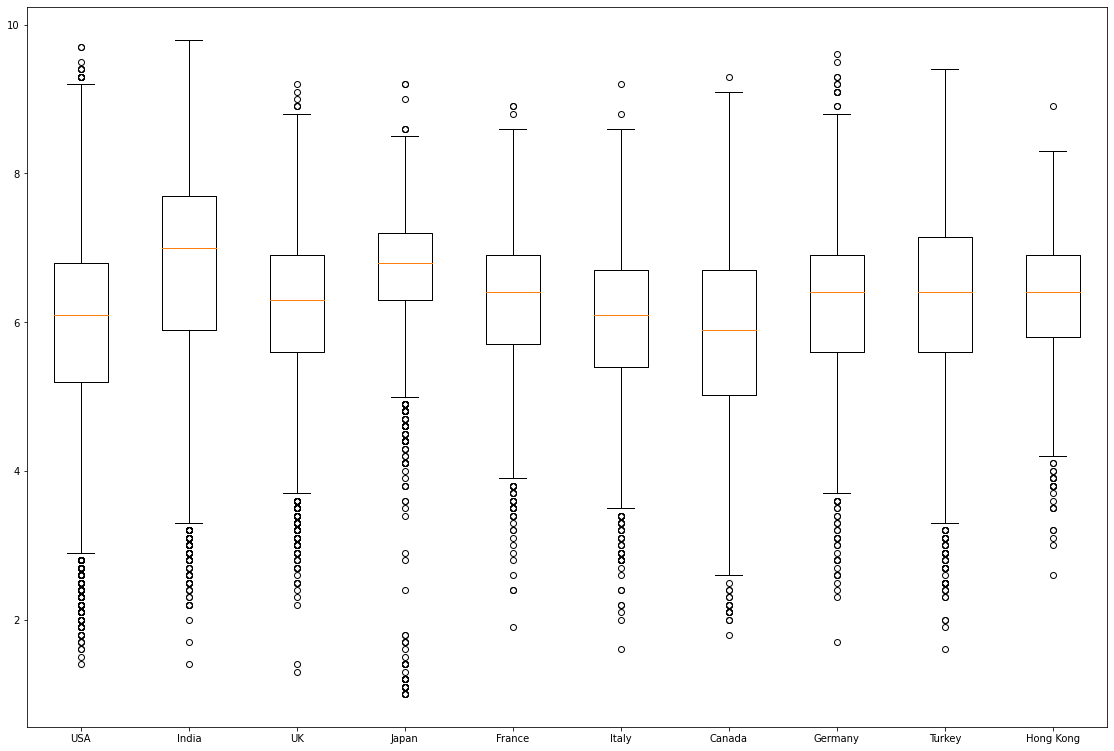

In [13]:
## EDA, Looking For Relation between Country Origin & Rating (Continued)
## ---------------------------------------------------------

fig = plt.figure(figsize=(15,10))
ax = fig.add_axes([0,0,1,1])
country = []
#Plotting Quartile Info
for i in most_freq_countries:
    df_ = df[df['country'] == i]
    country.append(df_['mean_vote'])
    
ax.set_xticklabels(most_freq_countries)
bp = ax.boxplot(country)

plt.show()